In [1]:
import numpy as np

from layers import Softmax
from utils import get_data, cross_entropy_loss
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
class Tensor:
    def __init__(self, shape):
        self.data = np.random.normal(size=shape)
        self.grad = np.zeros(shape=shape)

In [4]:
class Abstract_Layer(object):
    input: np.ndarray

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def backward(self, d_y: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def parameters(self):
        return []

In [5]:
class Softmax(Abstract_Layer):
    probabilities: np.ndarray
    true_label: np.ndarray

    def __init__(self, in_nodes, out_nodes):
        self.weights = Tensor((in_nodes, out_nodes))
        self.bias = Tensor((1, out_nodes))
        self.type = 'softmax'

    def forward(self, x: np.ndarray) -> np.ndarray:
        self.input = x
        linear_output = np.dot(x, self.weights.data) + self.bias.data
        logits = np.exp(linear_output - np.max(linear_output, axis=1, keepdims=True))
        self.probabilities = logits / np.sum(logits, axis=1, keepdims=True)
        return self.probabilities

    def backward(self, true_label: np.ndarray) -> np.ndarray:
        error = self.probabilities
        error[range(len(true_label)), true_label] -= 1.0
        error /= len(true_label)
        self.weights.grad += np.dot(self.input.T, error)
        self.bias.grad += np.sum(error, axis=0, keepdims=True)
        return np.dot(error, self.weights.data.T)

    def parameters(self):
        return [self.weights, self.bias]

In [6]:
X, Y, _, _ = get_data('PeaksData')

In [109]:
soft_max_layer = Softmax(2, 5)

def f(w, b):
    l2 = deepcopy(soft_max_layer)
    l2.weights.data = w
    l2.bias.data = b
    return cross_entropy_loss(l2.forward(X), Y)


def grad_w(w, b):
    l2 = deepcopy(soft_max_layer)
    l2.weights.data = w
    l2.bias.data = b
    e = l2.forward(X)
    e[range(len(Y)), Y] -= 1
    e /= len(Y)
    return np.dot(X.T, e).ravel()


def grad_b(w, b):
    l2 = deepcopy(soft_max_layer)
    l2.weights.data = w
    l2.bias.data = b
    e = l2.forward(X)
    e[range(len(Y)), Y] -= 1
    e /= len(Y)
    return np.sum(e, axis=0, keepdims=True).ravel()

In [110]:
w = soft_max_layer.weights.data
d = np.random.random(w.ravel().shape)
d = d / np.sum(d)

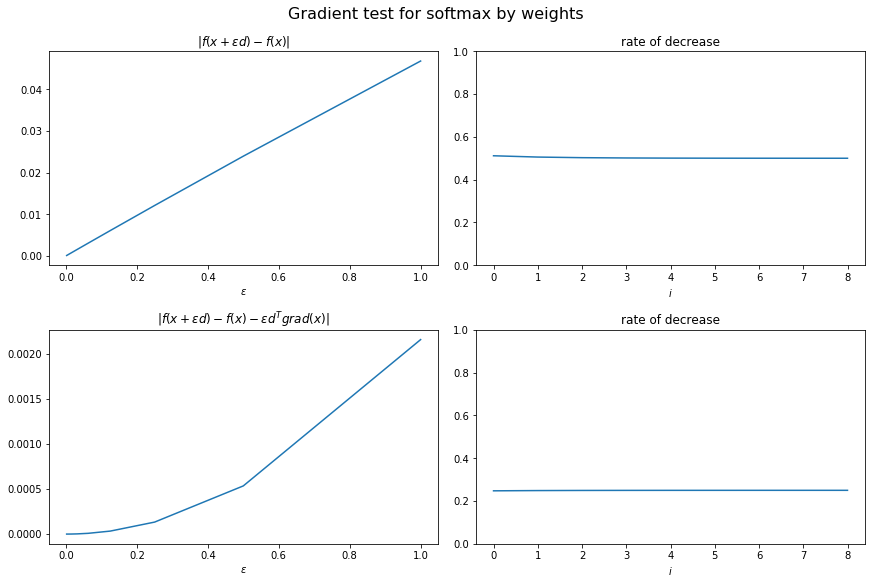

In [111]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

w = soft_max_layer.weights.data
b = soft_max_layer.bias.data

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Gradient test for softmax by weights', fontsize=16)

res1 = [np.abs(f(w + epss * d.reshape((2, 5)),b) - f(w,b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$|f(x+\epsilon d) - f(x)|$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.abs(f(w + epss * d.reshape((2, 5)),b) - f(w, b) - epss * np.dot(d.T, grad_w(w, b))) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - \epsilon d^{T} grad(x)|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()

In [112]:
b = soft_max_layer.bias.data
d = np.random.random(b.ravel().shape)
d = d / np.sum(d)

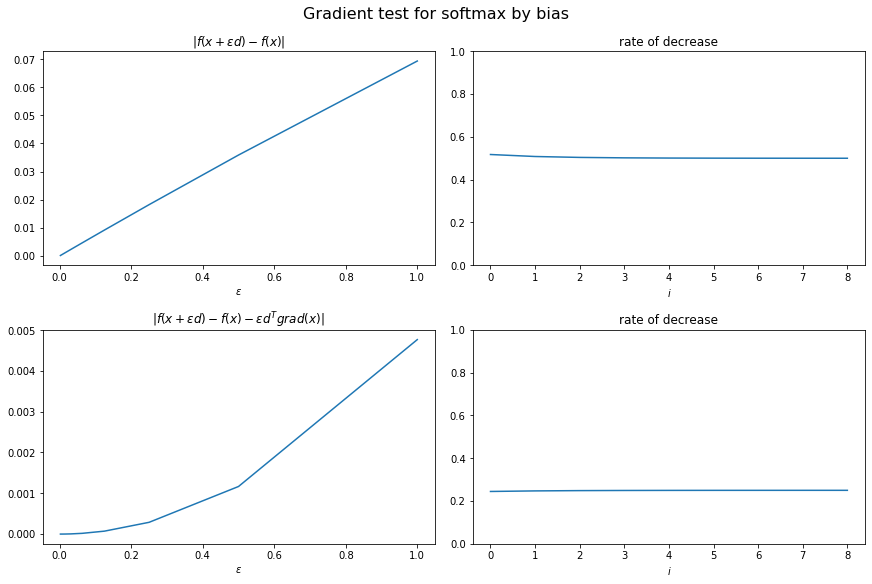

In [115]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

w = soft_max_layer.weights.data
b = soft_max_layer.bias.data

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Gradient test for softmax by bias', fontsize=16)

res1 = [np.abs(f(w, b + epss * d.reshape(b.shape)) - f(w, b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$|f(x+\epsilon d) - f(x)|$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.abs(f(w, b + epss * d.reshape(b.shape)) - f(w, b) - epss * np.dot(d.T, grad_b(w, b))) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - \epsilon d^{T} grad(x)|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()